In [155]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

%run ../../util.ipynb
%run RidgeLSRegression.ipynb
%run NeuralNetRegression.ipynb
%run NearestNeighborRegression.ipynb
%run NearestNeighborClassification.ipynb
%run LDAClassification.ipynb
%run QDAClassification.ipynb
%run NeuralNetClassification.ipynb
%run SVMClassification.ipynb

## Import Data and Pre-Process

In [149]:
X = np.load("../../data_matrices/X.npy")
Y = np.load("../../data_matrices/Y.npy")

# Round for classification
Y_round = np.array([int(np.round(y)) for y in Y])

XScaler = StandardScaler()
YScaler = StandardScaler()

X = XScaler.fit_transform(X)
Y = YScaler.fit_transform(Y)

## Ridge LS Regression Model

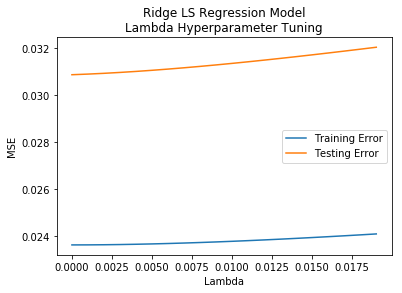

In [4]:
ridge_train_errors = []
ridge_test_errors = []
lmdas = np.arange(0,.02,.001)
for l in lmdas:
    ridge_m = RidgeLSRegressionModel(l)
    ridge_train_errors += [computeTrainError(ridge_m, X, Y, YScaler)]
    ridge_test_errors += [computeTestError(ridge_m, X, Y, YScaler)]
plt.plot(lmdas, ridge_train_errors)
plt.plot(lmdas, ridge_test_errors)
plt.legend(['Training Error', 'Testing Error'])
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Ridge LS Regression Model\nLambda Hyperparameter Tuning')
plt.show()

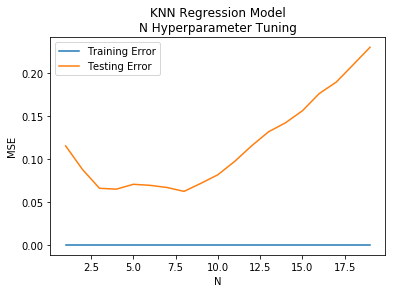

In [10]:
knn_train_errors = []
knn_test_errors = []
ns = np.arange(1,20)
weights = ['uniform', 'distance']
for n in ns:
    knn_m = NearestNeighborRegressionModel(weights[1], n)
    knn_train_errors += [computeTrainError(knn_m, X, Y, YScaler)]
    knn_test_errors += [computeTestError(knn_m, X, Y, YScaler)]
plt.plot(ns, knn_train_errors)
plt.plot(ns, knn_test_errors)
plt.legend(['Training Error', 'Testing Error'])
plt.xlabel('N')
plt.ylabel('MSE')
plt.title('KNN Regression Model\nN Hyperparameter Tuning')
plt.show()

In [140]:
svm_train_accuracies = []
svm_test_accuracies = []
Cs = np.arange(2.2,2.7,.001)
kernels = ['rbf', 'linear']
gammas = np.arange(.13,.19,.001)
best_params = []
best_acc = 0
for k in kernels:
    for c in Cs:
        for g in gammas:
            svm_m = SVMClassificationModel(k, c, g)
            computeTrainAccuracy(svm_m, X, Y_round)
            acc = computeTestAccuracy(svm_m, X, Y_round)
            if acc > best_acc:
                best_acc = acc
                best_params = [k,c,g]
print("SVM Best 10-fold cross validation accuracy: " + str(best_acc))
print('\n')
print("SVM Best 10-fold cross validation parameters: " + str(best_params))
print("(kernal type, C, gamma)")

SVM Best 10-fold cross validation accuracy: 0.9


SVM Best 10-fold cross validation parameters: ['rbf', 2.3069999999999884, 0.16800000000000004]
(kernal type, C, gamma)


In [151]:
lda_train_accuracies = []
lda_test_accuracies = []
solvers = ['svd', 'eigen', 'lsqr']
shrinks = np.arange(.01,1,.1)
ns = range(1,16)
best_params = []
best_acc = 0
for sol in solvers:
    for s in shrinks:
        for n in ns:
            lda_m = LDAClassificationModel(sol, s, n)
            computeTrainAccuracy(lda_m, X, Y_round)
            acc = computeTestAccuracy(lda_m, X, Y_round, k=3)
            if acc > best_acc:
                best_acc = acc
                best_params = [sol,s,n]
print("LDA Best 10-fold cross validation accuracy: " + str(best_acc))
print('\n')
print("LDA Best 10-fold cross validation parameters: " + str(best_params))
print("(solver type, shrinkage, number of components)")

LDA Best 10-fold cross validation accuracy: 0.977777777778


LDA Best 10-fold cross validation parameters: ['svd', 0.01, 1]
(solver type, shrinkage, number of components)
